# Part II - (Impact of Loan Characteristics on Borrower's APR)
## by (Awurigwe Joseph)

## Investigation Overview


In my inquiry, I sought to look at the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan length, borrower's claimed monthly income.


## Dataset Overview

The dataset comprised of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan length, borrower's reported monthly income, as well as many additional features such as borrower's employment status, debt to income ratio, current loan status etc. Many data points were eliminated from the analysis owing to very large claimed monthly income considered as outliers and missing borrower APR information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
# Subset the dataframe by selecting features of interest
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors', 'IncomeRange'
]

loan = df[target_columns]
#renaming ProsperRating (Alpha) and ListingCategory (Numeric)
loan.rename(columns={'ProsperRating (Alpha)':'ProsperRating_Alpha', 'ListingCategory (numeric)':'ListingCategory_Numeric'}, inplace=True)
# data wrangling, remove loans with missing borrower APR information
loan = loan[~loan.BorrowerAPR.isna()]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loan = loan[loan.StatedMonthlyIncome<=30000]
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan['ProsperRating_Alpha'] = loan['ProsperRating_Alpha'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype(ordered_var)
loan.shape

(113585, 15)

## Distribution of Borrower APR

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.42.

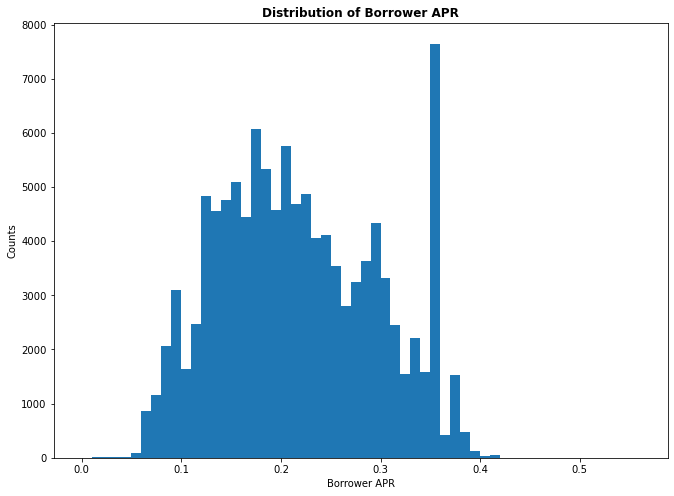

In [4]:
bins = np.arange(0, loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[11, 8])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('Counts')
plt.title('Distribution of Borrower APR', fontweight='bold');

## Distribution of Original Loan Amount

The very large spikes in frequency are at 10000, 15000, 20000, 25000, and 35000. There are also small spikes at 8000, 9000, 11000, 12000, 13000, 140000 etc. It means that most of the loans are multiples of 1000.

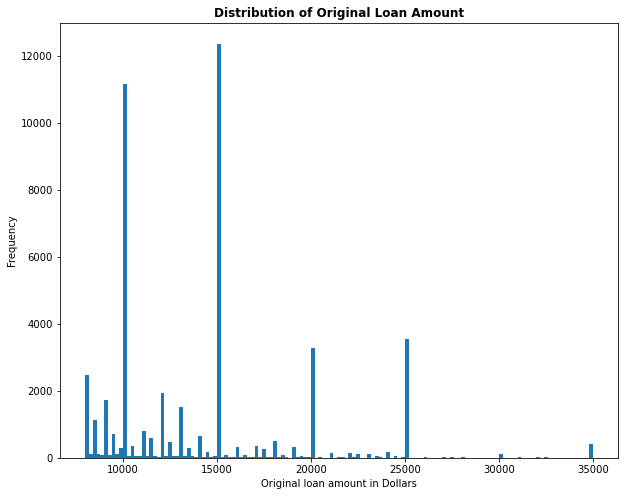

In [5]:
bins = np.arange(8000, loan.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[10, 8])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount in Dollars');
plt.ylabel('Frequency')
plt.title('Distribution of Original Loan Amount', fontweight='bold');

## Borrower APR vs. Loan Amount

At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR decrease with increase of loan amount

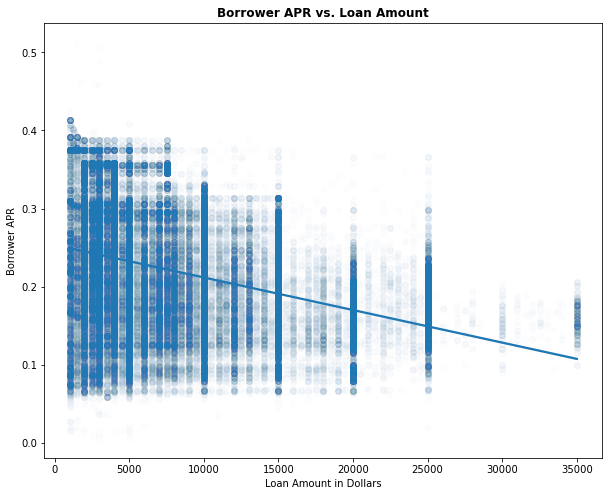

In [6]:
plt.figure(figsize = [10, 8])
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.xlabel('Loan Amount in Dollars')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount', fontweight='bold');

## Prosper Rating Effect on Relationship between APR and Loan Amount

A higher rating raises the loan amount. A better rating lowers the borrower APR. It's interesting to note that as Prosper ratings rise from HR to A or higher, the correlation between borrower APR and loan amount changes from being negatively to marginally positively. This may be so because borrowers with A or AA ratings frequently borrow more money; a higher APR would deter them from doing so and increase the lender's profit. However, because people with poorer credit tend to borrow less money, a lower APR might persuade them to do so.

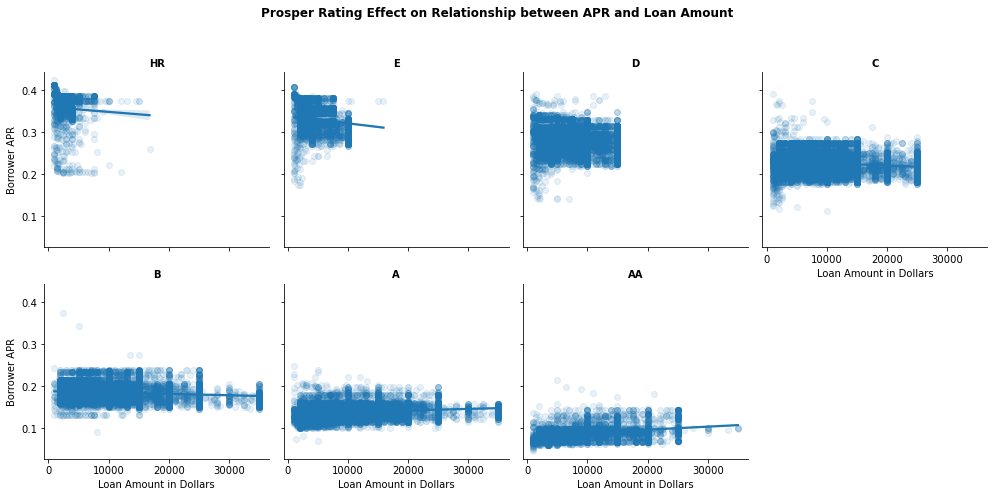

In [7]:
g=sb.FacetGrid(data=loan,col='ProsperRating_Alpha', height=3.5, col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.1});
g.set_titles('{col_name}', fontweight='bold')
g.add_legend();
g.set_xlabels('Loan Amount in Dollars')
g.set_ylabels('Borrower APR')
plt.suptitle('Prosper Rating Effect on Relationship between APR and Loan Amount', fontweight='bold');
plt.subplots_adjust(top=0.85)

## Borrower APR by Rating and Term

It's interesting to note that for borrowers with HR-C rates, the borrower APR decreases as the borrow period lengthens. However, the APR rises as the length of the loan increases for borrowers with B-AA grades.

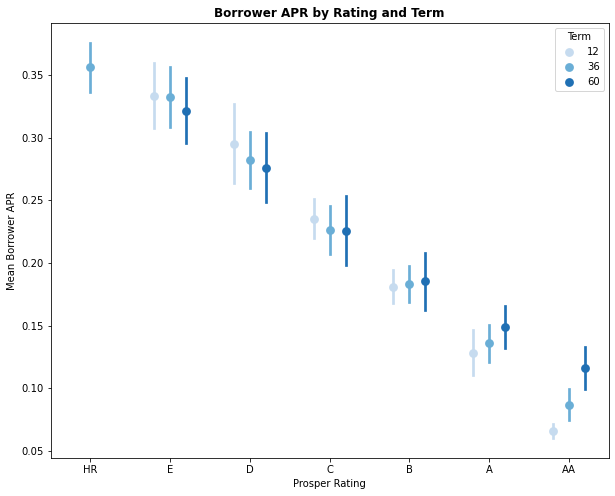

In [8]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = loan, x = 'ProsperRating_Alpha', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term', fontweight='bold');

In [5]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 976703 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\my_env\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\envs\my_env\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\my_env\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\my_env\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\env

In [2]:
pip install jupyter_contrib_nbextensions

     ---------------------------------------- 23.5/23.5 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached jupyter_highlight_selected_word-0.2.0-py2.py3-none-any.whl (11 kB)
     ------------------------------------ 481.7/481.7 kB 974.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.6/3.6 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 153.2/153.2 kB 482.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pywinpty>=1.1.0 in c:\programdata\anaconda3\envs\my_env\lib\site-packages (from terminado>=0.8.3->notebook>=6.0->jupyter_contrib_nbextensions) (2.0.2)



  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [95 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\jupyter_nbextensions_configurator
  copying src\jupyter_nbextensions_configurator\application.py -> build\lib\jupyter_nbextensions_configurator
  copying src\jupyter_nbextensions_configurator\__init__.py -> build\lib\jupyter_nbextensions_configurator
  running egg_info
  writing src\jupyter_nbextensions_configurator.egg-info\PKG-INFO
  writing dependency_links to src\jupyter_nbextensions_configurator.egg-info\dependency_links.txt
  writing entry points to src\jupyter_nbextensions_configurator.egg-info\entry_points.txt
  writing requirements to src\jupyter_nbextensions_configurator.egg-info\requires.txt
  writing top-level names to src\jupyter_nbextensions_configurator.egg-info\top_level.txt
  reading manifest file 'src\jupyter_nbextensi

  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428786 sha256=a0e04bbb3f11c4b86b9fa3c5a750cf710e4847dd317256e598534a68071b6c3a
  Stored in directory: c:\users\jojo\appdata\local\pip\cache\wheels\9c\57\38\7b0046dbc034aa0b2a5af0a26b60c08030f3ede6ca9cf568fa
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=fb08b00a40ce920ec151306cfb585eae00f9593e788998c6af77c5c2844a7d77
  Stored in directory: c:\users\jojo\appdata\local\pip\cache\wheels\79\cf\67\d2c1aab9313f1ac5f23e30485ff8cccbb062b3a77c00df2b2d
  Running setup.py clean for jupyter_nbextensions_configurator
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core
Failed to build jupyter_nbextensions_configurator
  Running setup.py install for jupyter_nbextensions_configurator: started
  Running setup.py install for jupyter_nbextensions_configurator: finished with status 'done'
